# M1 Adsorption à la surface d’une sphere (exam 2019) 

Ce problème permet de traiter du couplage entre la diffusion dans une couche limite autour d'une sphère (en coordonnées sphériques) et une réaction d'adsorption en surface de la sphère.

On considère l’adsorption d’un soluté sur des sphères d’un rayon, R, de 1 micromètres. Le soluté diffuse dans la solution où il se trouve à une concentration, c_b=1\ g/L, avec un coefficient de diffusion de 2 10-9 m2/s. La dispersion de sphères et de soluté est agitée : l’agitation induit une différence de vitesse entre les sphères et la solution de 1 m/s. On considère que l’adsorption se réalise comme une réaction chimique de cinétique d’ordre 1 avec une constante de 0.1 (SI). 

**Calculer l’épaisseur de couche limite, $\delta$, autour de la sphère.** On considéra que les propriétés de la solution sont proches de celle de l’eau à 20°C


In [64]:
#Adsorption sur une sphère

import numpy as np
import matplotlib.pyplot as plt

#Calcul de l'épaisseur de la couche limite

rho=1000
mu=0.001
u=1 
R=1e-6

Re=rho*u*2*R/mu
print ('Re=',Re)

D=2e-9 
Sc=mu/(rho*D)
print ('Sc=',Sc)

Sh=2+0.95*Re**0.5*Sc**0.33 #pour 2<Re<2000
print ('Sh=',Sh)
k=D*Sh/(2*R)
delta=D/k
print ('k=',k, '    delta=', delta)

Re= 2.0
Sc= 499.99999999999994
Sh= 12.444765756405452
k= 0.012444765756405454     delta= 1.607101362249891e-07


**Ecrire les équations permettant de décrire le profil de concentration stationnaire en solute dans la couche limite entourant les sphères.** Vous considèrerez des coordonnées sphériques.
>L'équation de continuité s'écrit :
$$\frac{dc}{dt}=-div(\vec{N})+-s$$
>En régime stationnaire et en absence de terme source, 
$$-div(\vec{N})=0$$
L'écriture de l'opérateur divergence en coordonnée sphérique https://fr.wikipedia.org/wiki/Divergence_(analyse_vectorielle) conduit à 
$$\frac{d r^2N}{dr}=0$$
Le produit de la densité du flux de matière, $N$ (en kg par m2 et par s) par le rayon au carré, $r^2$ (qui représente le flux de matière en kg par s) doit être constant :
>$$r^2 N = -K$$
où K est une constante (le flux de matière sera dirigé dans le sens opposé à r -vers la sphère-, $N$ sera donc négatif. Il a été choisi -arbitrairement- d'écrire $-K$ dans le second terme de l'équation précédente de façon à ce que la constante soit positive par la suite).
Si on considère que le transfert est diffusif dans la couche limite, on peut écrire :
>$$r^2 D \frac{dc}{dr} = K$$
On peut séparer les variables :
>$$ dc = \frac{K}{D} \frac{dr}{r^2}$$
L'intégration de cette équation conduit à :
>$$ c =- \frac{K}{D} \frac{1}{r} + K_1$$
On peut déterminer la constante en écrivant la condition limite en $r=R+\delta$ pour laquelle $c=c_b$ qui conduit à :
$$K_1=c_b+\frac{K}{D} \frac{1}{R+\delta}$$
soit 
$$ c  = c_b \frac{K}{D} (\frac{1}{r} - \frac{1}{R+\delta})$$
En considérant la distance, z à la surface de la sphère (z=r-R) on peut écrire le profil de concentration :
au profil de concentration :
>$$c=c_b-\frac{K}{D}(\frac{1}{R+z}-\frac{1}{R+\delta})$$

**Déterminer la densité de flux de matière, $N$**

>La densité de flux de matière est déterminée à partir du profil de concentration en considérant que le flux de matière est diffusif :
$$N=-D\frac{dc}{dz}=-\frac{K}{(R+z)^2}$$

**Ecrire la condition pour le flux de matière à la surface de la sphère et en déduire K**

>A l'interface, en z=0, la matière qui arrive par diffusion, $N$ (en kg.m-2.s-1) est consommée par la réaction hétérogène. La vitesse de la réaction hétérogène (en kg.m-2.-1) s'écrit pour une réaction de premier ordre $k_r c_i$
On a donc l'égalité : 
$$N=kr.ci$$
En z=0, la densité de flux de matière s'écrit $-\frac{K}{R^2}$ ce qui conduit à définir la constante, $K$:
$K=kr.ci R^2$

**En déduire alors la relation donnant la concentration à l’interface $c_i$**
>On obtient $c_i$ en calculant la concentration $c$ en z=0 et en utilisant la valeur de la constante, K
$$c_i=c_b-\frac{k_r c_i R^2}{D}(\frac{1}{R}-\frac{1}{R+\delta})$$
$$c_i=c_b-\frac{k_r c_i R}{D}(1-\frac{R}{R+\delta})$$
Sous forme adimensionnelle, on peut écrire :
$$\frac{c_i}{c_b}=\frac{1}{1+Da \frac{R}{R+\delta}}$$
avec un nombre de Damkholer qui représente le rapport entre la réaction et la diffusion dans le film :
$Da=\frac{k_r \delta}{D}$



Da= 8.035506811249455
la concentration à l'interface est : 0.1262160454515761


Text(0.5, 1.0, 'Profil de concentration')

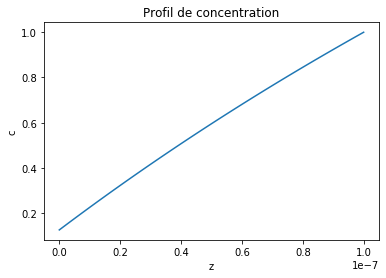

In [65]:
kr=0.1
c_b=1

z=np.linspace(0,delta,100)

Da=kr*delta/D
print ('Da=',Da)
c_i=c_b/(1+Da*R/(R+delta))
print ('la concentration à l\'interface est :', c_i)

K=kr*c_i*R*R
c=c_b-K*((1/(R+z)-1/(R+delta)))/D
plt.plot(r,c)
plt.xlabel('z')
plt.ylabel('c')
plt.title('Profil de concentration')

**Déterminer l’efficacité de l’adsorption et comparer à celle que vous auriez en coordonnées rectilignes. Commenter.**

>Le facteur d'éfficacité définit comme le rapport entre la réaction effective, $k_r c_i$ et la réaction si la diffusion était infinie $k_r c_0$ s'écrit alors :
$$\eta=\frac{1}{1+Da \frac{R}{R+\delta}}$$
On remarque que si $\delta<<R$ on retrouve l'expression obtenue en coordonnées rectilignes :
$$\eta=\frac{1}{1+Da \frac{R}{R+\delta}}$$


In [66]:
print('L\'efficacité de la réaction est de ', 1/(1+Da*R/(R+delta)))
print('L\'efficacité de la réaction serait en coor. rect de ', 1/(1+Da))
print ('La courbure autour de la sphère permet d\'augmenter la diffusion')


L'efficacité de la réaction est de  0.1262160454515761
L'efficacité de la réaction serait en coor. rect de  0.110674478022082
La courbure autour de la sphère permet d'augmenter la diffusion


**Calculer la concentration à l’interface et la quantité de soluté qui s’adsorbe à la surface de la sphère en g/s.**
> La quantité consommé en kg par m2 et par s est $k_r c_i$
> La quantité consommé en kg par s est $k_r c_i  4\pi R^2$


In [67]:
print ('Le flux consommé à l\'interface est :', kr*c_i*4*np.pi*R*R, 'kg/s')

Le flux consommé à l'interface est : 1.5860776046233077e-13 kg/s


**Calculer le nombre et le volume de sphères en mL nécessaire pour abaisser la concentration initiale de 10 % en 1 min dans 1 litre.**

In [68]:
conso=0.1 #g en 1 min
conso=0.1e-3/(1*60) #kg/s
nombre =conso/(kr*c_i*4*np.pi*R*R)

print ('Nombre de grain nécessaire pour une consommation de 0.1 g en 10 min', nombre)

vp=4*np.pi*R*R*R/3
print ('Ce nombre de grain correspond à un volume de ',vp*nombre*1e6, 'mL de particules')

Nombre de grain nécessaire pour une consommation de 0.1 g en 10 min 10508102.893631732
Ce nombre de grain correspond à un volume de  4.4016238471732114e-05 mL de particules


# Adsorption dans un grain poreux
On considère l’adsorption d’un soluté dans des sphères d’un rayon, R, de 1 micromètres et avec une surface spécifique de 3 10-6 m2/m3. Le soluté diffuse dans le grain avec un coefficient de diffusion de 2 10-9 m2/s. La concentration en soluté est, c_i=1\ g/L, à la surface du grain. On considère que l’adsorption se réalise comme une réaction chimique de cinétique d’ordre 1 avec une constante de 0.1 (SI). 

**Quel est la limitation à la consommation dans le grain ?**

> On est dans la configuration d'un couplage entre une réaction hétérogène dans un grain poreux et un phénomène de diffusion interne. Il est nécessaire de calculer le module de Thiele. 
$$\phi_s=R\sqrt{\frac{a k_r}{D}}$$
Le nombre de Thiele est très supérieur à 1 : le procédé est limité par la diffusion interne qui ne permet pas de transporter assez de réactif vers le centre du grain. 
	
**Calculer l’efficacité de la réaction dans le grain.**

>L'efficacité se définit :
$$\eta=\frac{3}{\phi_s^2}(\frac{\phi_s}{tanh(\phi_s)}-1)$$

**Déterminer la quantité consommée dans un grain en g/s. Comparer à la question A-10. Commenter.**

> La quantité consommée dans la première partie est calculée pour une surface non poreuse avec une résistance au transfert de matière dans la couche limite. Dans cette deuxième partie, on considère le transfert à l'intérieur du grain (qui est maintenant poreux) mais en absence de résistance dans la couche limite. Pour traiter du problème dans son ensemble, il faudrait combiner en série le transfert dans la couche limite puis le transfert dans le volume du grain. 


In [69]:
a=3/R #m2/m3
print ('a=', a)

phis=R*np.sqrt(a*kr/D)
print ('Le module de Thiele est', phis)
n=4*np.pi*R*D*c_b*(1-phis/np.tanh(phis))

eff=3*(phis/np.tanh(phis)-1)/(phis**2)
print ('L efficacité du procédé est de', round(eff*100), '%')

print ('Le flux de matière entrant dans le grain et donc la quantité de matière consommée dans le grain est :', n, 'kg/s')



a= 3000000.0
Le module de Thiele est 12.24744871391589
L efficacité du procédé est de 22.0 %
Le flux de matière entrant dans le grain et donc la quantité de matière consommée dans le grain est : -2.8267921802429726e-13 kg/s
